### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# import warnings
# warnings.filterwarnings("error")

### Load the dataset

In [3]:
data = pd.read_json(r"C:\Users\Windows\Downloads\Sarcasm_Headlines_Dataset.json", lines = True)

In [4]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
data = data.drop('article_link',axis=1) #drop the article_link we consider headline as independent variable

In [6]:
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
data.isnull().sum() # check is null value is there or not

headline        0
is_sarcastic    0
dtype: int64

### Count of Sarcastic and non sarcastic words

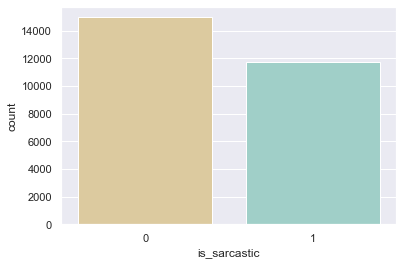

In [8]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x ='is_sarcastic',data=data,palette="BrBG")

### Most common words

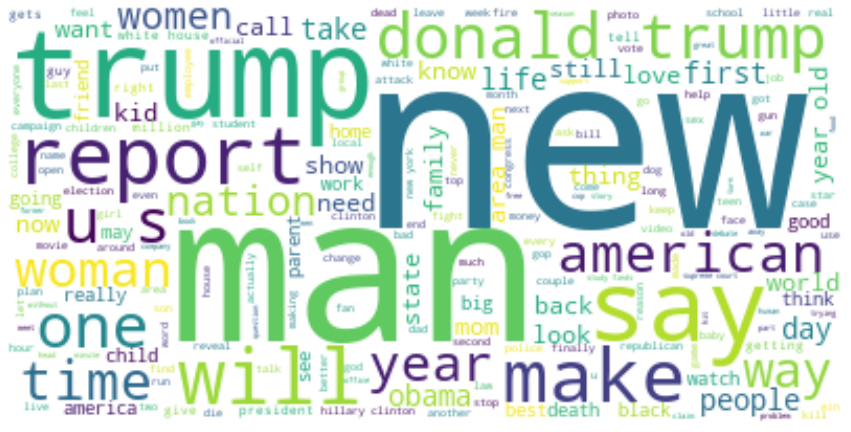

In [9]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in data.headline)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Cleaning the head_line texts

In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['headline'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
corpus[0:5]

['former versac store clerk sue secret black code minor shopper',
 'roseann reviv catch thorni polit mood better wors',
 'mom start fear son web seri closest thing grandchild',
 'boehner want wife listen not come altern debt reduct idea',
 'j k rowl wish snape happi birthday magic way']

### Creating the Bag of Words model

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Training the Naive Bayes model on the Training set

In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = classifier.predict(X_test)

### Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)

[[2050  957]
 [ 587 1748]]


In [17]:
print(acc)

0.7109696742792961


### Creating the TF - IDF Vectorizer model

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [19]:
y=data['is_sarcastic']

In [20]:
X.shape

(26709, 5000)

#### Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(20031, 5000)
(6678, 5000)
(20031,)
(6678,)


In [23]:
count_df = pd.DataFrame(X1_train, columns=tfidf_v.get_feature_names_out())

In [24]:
count_df.head()

,aaron,abandon,abc,abil,abl,abort,abram,abroad,absenc,absolut,...,younger,youth,youtub,zero,zika,zimmerman,zip,zone,zoo,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)

GaussianNB()

In [26]:
y1_pred = classifier.predict(X1_test)

In [27]:
acc

0.7109696742792961

### MultinomialNB Algorithm

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [29]:
classifier.fit(X1_train, y1_train)
pred = classifier.predict(X1_test)
pred = classifier.predict(X1_test)
score = accuracy_score(y1_test, pred)
score

0.782869122491764

### Multinomial Classifier with Hyperparameter

In [30]:
classifier=MultinomialNB(alpha=0.1)

In [31]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X1_train,y1_train)
    y_pred=sub_classifier.predict(X1_test)
    score = accuracy_score(y1_test, pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Windows\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, Score : 0.782869122491764
Alpha: 0.1, Score : 0.782869122491764
Alpha: 0.2, Score : 0.782869122491764
Alpha: 0.30000000000000004, Score : 0.782869122491764
Alpha: 0.4, Score : 0.782869122491764
Alpha: 0.5, Score : 0.782869122491764
Alpha: 0.6000000000000001, Score : 0.782869122491764
Alpha: 0.7000000000000001, Score : 0.782869122491764
Alpha: 0.8, Score : 0.782869122491764
Alpha: 0.9, Score : 0.782869122491764
